In [2]:
! pip install ome-zarr

     |████████████████████████████████| 54 kB 930 kB/s  eta 0:00:01
     |████████████████████████████████| 52 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 7.7 MB 60.6 MB/s eta 0:00:01
  Created wheel for aiobotocore: filename=aiobotocore-1.4.2-py3-none-any.whl size=49925 sha256=c4977e0895ced335d3b24cfbc414b06bd3df8af2385577d27d2b5aa0f0ae9dc5
  Stored in directory: /root/.cache/pip/wheels/89/67/d6/725476664f3da37fcebda5b1299af2b50702f98efa92591ae3
Successfully built aiobotocore
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0


In [2]:
import napari
import pandas as pd
from ome_zarr.io import parse_url
from ome_zarr.reader import Node, Reader
import numpy as np
import tifffile as tf

In [4]:
# root = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20220121_40x_decoded/20220119_decoding/"
# root = "/nfs/team283_imaging/HZ_HLB/playground_Tong/HZ_HLB_hindlimb_20220130_63x_fine_tune/"
# root = "/nfs/team283_imaging/HZ_HLB/playground_Tong/HZ_HLB_hindlimb_20220214_63x_decoded/"
root = "/nfs/team283_imaging/LY_BRC/playground_Tong/20220325_decoding/"
detected_peaks_path = root + "/anchor_spots/out_opt_flow_registered_detected_peaks.tsv"
raw_path = root + "/raws/out_opt_flow_registered/0"
# reader = Reader(parse_url(raw_path))

In [7]:
# decoded_peaks_path = root + "/decoded/out_opt_flow_registered_decoded_df.tsv"
decoded_peaks_path = root + "/decoded/LY_BRC_KR118_opt_flow_registered_decoded_df.tsv"


# Display peak locations

In [20]:
detected_peaks = pd.read_csv(detected_peaks_path, sep="\t")

In [9]:
detected_peaks

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,x_int,y_int
0,0,1037.404575,6179.637593,156261.128811,1.859017,0.654621,19565.104993,524313.0,0.003752,6179,1037
1,1,1037.000824,6482.000542,106014.803505,1.189791,0.423967,19054.658914,197092.0,0.009989,6482,1037
2,2,1037.000057,8142.000141,105819.122535,1.189581,0.424008,19023.541451,196189.0,0.010035,8142,1037
3,3,1037.354468,11783.560444,177903.922886,2.014407,0.780483,22658.898932,588068.0,0.003345,11783,1037
4,4,1037.419984,12203.417475,223017.063588,1.769596,0.555018,24899.954696,524275.0,0.003752,12203,1037
...,...,...,...,...,...,...,...,...,...,...,...
6644443,6644443,25752.176900,40885.725609,305146.222016,1.561832,0.344080,33152.066574,786085.0,0.002502,40885,25752
6644444,6644444,25751.568887,41975.943592,395712.401863,1.851592,0.269518,28360.575652,1371548.0,0.001434,41975,25751
6644445,6644445,25752.657440,41988.086433,151608.469648,1.558832,0.484480,21272.974993,459229.0,0.004284,41988,25752
6644446,6644446,25752.068430,43875.935934,273660.734962,1.472447,0.283052,34238.784135,655100.0,0.003002,43875,25752


In [2]:
viewer = napari.Viewer()

2022-03-10 19:05:47,991 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log


[INFO] Resource 'XMLSchema.xsd' is already loaded


2022-03-10 19:05:48,804 [INFO] Resource 'XMLSchema.xsd' is already loaded


In [21]:
img_layer = viewer.add_image(list(reader())[0].data)

NameError: name 'reader' is not defined

In [16]:
spots_layer = viewer.add_points(detected_peaks[["y", "x"]].to_numpy(), face_color="red", size=3)

2021-12-23 13:57:11,562 [ERROR] Exception in callback BaseAsyncIOLoop._handle_events(142, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(142, 1)>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/opt/conda/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/opt/conda/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 452, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 481, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_un

/opt/conda/lib/python3.8/site-packages/napari/utils/events/event.py:444: RuntimeWarning: coroutine 'get_msg' was never awaited
  for ri, criteria in enumerate((before, after)):
/opt/conda/lib/python3.8/site-packages/vispy/visuals/transforms/transform_system.py:145: RuntimeWarning: coroutine 'get_msg' was never awaited
  self._mappings = {'ct0': None, 'ct1': None, 'ft0': None}


# Display decoded peaks

In [8]:
decoded_peaks = pd.read_csv(decoded_peaks_path, sep="\t")

In [9]:
decoded_peaks.Name.unique()

array(['CLU', 'IGFBP3', 'MDM2', 'CPVL', 'CCR7', 'KRT5', 'MGST1', 'IFIT2',
       'SAMSN1', 'TFF3', 'IRF8', 'FAP', 'CCL2', 'RGS5', 'KLRB1', 'FGFR1',
       'SLC39A6', 'CTLA4', 'NME4', 'DERL3', 'CD4', 'RAD51C', 'TMEM176B',
       'SIGLEC1', 'EGFL7', 'RBP7', 'CKS1B', 'CCDC50', 'CD83', 'FCER1A',
       'RAMP2', 'GNG11', 'HIGD1B', 'KRT19', 'CPNE3', 'STXBP2', 'EGFR',
       'S100A13', 'PDCD1', 'IRF7', 'PSMC5', 'LAG3', 'EIF2AK2', 'AKT1',
       'STRAP', 'VCAN', 'NKG7', 'SCUBE2', 'COL5A2', 'CD82', 'PRCP',
       'TIGIT', 'APOC1', 'FCGR3A', 'IL7R', 'COL4A2', 'GBP1', 'CST7',
       'GRB7', 'NDUFA4L2', 'DAB2', 'STK17A', 'TYMS', 'ZNF683', 'EGR1',
       'ZNF217', 'MS4A1', 'C1S', 'BACH2', 'NR3C1', 'ELF3', 'ACKR1',
       'LAMP3', 'DCN', 'CARD16', 'SERPINA1', 'SMIM14', 'infeasible',
       'MKI67', 'CTSL', 'MYH11', 'CCL21', 'TACSTD2', 'GGT5', 'LDLRAD4',
       'APOD', 'CCNE1', 'LYVE1', 'CD68', 'IL1B', 'AKT2', 'KRT15',
       'COL5A1', 'MIEN1', 'PIK3CA', 'SORBS2', 'CCL28', 'MAFF', 'CRYAB',
       'MY

In [10]:
decoded_group = decoded_peaks[decoded_peaks.Probability > 0.9]

In [11]:
decoded_group = decoded_peaks.groupby("Name")

In [14]:
viewer = napari.Viewer()

In [18]:
img_layer = viewer.add_image(list(reader())[0].data, scale=[0.09, 0.09])

2022-03-16 10:13:53,435 [INFO] root_attr: multiscales
2022-03-16 10:13:53,436 [INFO] datasets [{'path': '0'}, {'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}, {'path': '6'}]
2022-03-16 10:13:53,474 [INFO] resolution: 0
2022-03-16 10:13:53,474 [INFO]  - shape None = (1, 35, 1, 26526, 46871)
2022-03-16 10:13:53,475 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 926)', '1024 (+ 791)']
2022-03-16 10:13:53,475 [INFO]  - dtype = >u2
2022-03-16 10:13:53,489 [INFO] resolution: 1
2022-03-16 10:13:53,489 [INFO]  - shape None = (1, 35, 1, 13263, 23435)
2022-03-16 10:13:53,490 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 975)', '1024 (+ 907)']
2022-03-16 10:13:53,490 [INFO]  - dtype = >u2
2022-03-16 10:13:53,498 [INFO] resolution: 2
2022-03-16 10:13:53,498 [INFO]  - shape None = (1, 35, 1, 6631, 11717)
2022-03-16 10:13:53,499 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 487)', '1024 (+ 453)']
2022-03-16 10:13:53,499 [INFO]  - dtype = >u2
2022-03-16 10:13:53,505 [INFO] resol

In [15]:
spot_layers = {}
for n, grp in decoded_group:
#     print(n, grp)
    spot_layers[n] = viewer.add_points(grp[["y_int", "x_int"]].values, name=n, visible=False, size=100, edge_color="red")

/opt/conda/lib/python3.8/site-packages/napari/utils/events/event.py:870: RuntimeWarning: coroutine 'get_msg' was never awaited
  emitter.connect((self.source, self.auto_connect_format % name))


In [10]:
target_genes = ["MYH3", "COL2A1", "KRT19", "PLVAP"]
gene_colors = {"MYH3": "#FFFF00", "COL2A1":"#FF1493", "KRT19":"#FF8C00", "PLVAP":"cyan"}
spot_sizes = {"MYH3": 20, "COL2A1":20, "KRT19":20, "PLVAP":20}

# target_genes = ["APLNR", "C1QA", "CAVIN2", "CHODL", "CLDN11", "CLU", "COL2A1", "COL9A2", "CSRP2", "DSC2",
#     "ELN", "FRZB", "FST", "HBZ", "HEMGN", "KRT19", "MATN4", "MEIS2", "MEOX2", "MYH3", "PLVAP"]


spot_layers = {}
for n, grp in decoded_group:
    if n in target_genes:
#         print(n, grp)
        spot_layers[n] = viewer.add_points(grp[["y_int", "x_int"]].values,
                                           name=n, visible=False,
                                           size=spot_sizes[n],
                                           face_color=gene_colors[n],
                                           edge_color=gene_colors[n],
#                                            size=100,
#                                            face_color="yellow",
#                                            edge_color="yellow",
#                                            opacity=1,
                                           scale=[0.09, 0.09],
                                           blending="translucent"
                                          )

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [11]:
viewer.scale_bar.unit = "um"

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/napari/_qt/containers/_layer_delegate.py", line 153, in editorEvent
    self.show_context_menu(
  File "/opt/conda/lib/python3.8/site-packages/napari/_qt/containers/_layer_delegate.py", line 185, in show_context_menu
    self._context_menu.update_from_context(get_context(layer_list))
  File "/opt/conda/lib/python3.8/site-packages/napari/_qt/widgets/qt_action_context_menu.py", line 117, in update_from_context
    enable = enable.eval(ctx)
  File "/opt/conda/lib/python3.8/site-packages/napari/utils/context/_expressions.py", line 186, in eval
    return eval(code, {}, context)
  File "<Expr>", line 1, in <module>
TypeError: '>' not supported between instances of 'NoneType' and 'int'
/opt/conda/lib/python3.8/site-packages/napari_animation/_qt/keyframeslist_widget.py:156: FutureWarning: Themes were changed to use evented model with Pydantic's color type rather than the `rgb(x, y, z)`. The `as_dict=True` option

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  1 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1138, 955) 

Rendering frame  2 of 46


[swscaler @ 0x57d28c0] Warning: data is not aligned! This can lead to a speed loss
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  3 of 46
Rendering frame  4 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  5 of 46
Rendering frame  6 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  7 of 46
Rendering frame  8 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  9 of 46
Rendering frame  10 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  11 of 46
Rendering frame  12 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  13 of 46
Rendering frame  14 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  15 of 46
Rendering frame  16 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  17 of 46
Rendering frame  18 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  19 of 46
Rendering frame  20 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  21 of 46
Rendering frame  22 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  23 of 46
Rendering frame  24 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  25 of 46
Rendering frame  26 of 46
Rendering frame  27 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  28 of 46
Rendering frame  29 of 46
Rendering frame  30 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  31 of 46
Rendering frame  32 of 46
Rendering frame  33 of 46
Rendering frame  34 of 46
Rendering frame  35 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  36 of 46
Rendering frame  37 of 46
Rendering frame  38 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  39 of 46
Rendering frame  40 of 46
Rendering frame  41 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  42 of 46
Rendering frame  43 of 46
Rendering frame  44 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  45 of 46
Rendering frame  46 of 46


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  1 of 298
Rendering frame  2 of 298
Rendering frame  3 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
[swscaler @ 0x62498c0] Warning: data is not aligned! This can lead to a speed loss


Rendering frame  4 of 298
Rendering frame  5 of 298
Rendering frame  6 of 298
Rendering frame  7 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  8 of 298
Rendering frame  9 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  10 of 298
Rendering frame  11 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  12 of 298
Rendering frame  13 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  14 of 298
Rendering frame  15 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  16 of 298
Rendering frame  17 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  18 of 298
Rendering frame  19 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  20 of 298
Rendering frame  21 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  22 of 298
Rendering frame  23 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  24 of 298
Rendering frame  25 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  26 of 298
Rendering frame  27 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  28 of 298
Rendering frame  29 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  30 of 298
Rendering frame  31 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  32 of 298
Rendering frame  33 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  34 of 298
Rendering frame  35 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  36 of 298
Rendering frame  37 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  38 of 298
Rendering frame  39 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  40 of 298
Rendering frame  41 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  42 of 298
Rendering frame  43 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  44 of 298
Rendering frame  45 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  46 of 298
Rendering frame  47 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  48 of 298
Rendering frame  49 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  50 of 298
Rendering frame  51 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  52 of 298
Rendering frame  53 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  54 of 298
Rendering frame  55 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  56 of 298
Rendering frame  57 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  58 of 298
Rendering frame  59 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  60 of 298
Rendering frame  61 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  62 of 298
Rendering frame  63 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  64 of 298
Rendering frame  65 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  66 of 298
Rendering frame  67 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  68 of 298
Rendering frame  69 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  70 of 298
Rendering frame  71 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  72 of 298
Rendering frame  73 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  74 of 298
Rendering frame  75 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  76 of 298
Rendering frame  77 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  78 of 298
Rendering frame  79 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  80 of 298
Rendering frame  81 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  82 of 298
Rendering frame  83 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  84 of 298
Rendering frame  85 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  86 of 298
Rendering frame  87 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  88 of 298
Rendering frame  89 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  90 of 298
Rendering frame  91 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  92 of 298
Rendering frame  93 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  94 of 298
Rendering frame  95 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  96 of 298
Rendering frame  97 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  98 of 298
Rendering frame  99 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  100 of 298
Rendering frame  101 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  102 of 298
Rendering frame  103 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  104 of 298
Rendering frame  105 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  106 of 298
Rendering frame  107 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  108 of 298
Rendering frame  109 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  110 of 298
Rendering frame  111 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  112 of 298
Rendering frame  113 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  114 of 298
Rendering frame  115 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  116 of 298
Rendering frame  117 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  118 of 298
Rendering frame  119 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  120 of 298
Rendering frame  121 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  122 of 298
Rendering frame  123 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  124 of 298
Rendering frame  125 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  126 of 298
Rendering frame  127 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  128 of 298
Rendering frame  129 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  130 of 298
Rendering frame  131 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  132 of 298
Rendering frame  133 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  134 of 298
Rendering frame  135 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  136 of 298
Rendering frame  137 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  138 of 298
Rendering frame  139 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  140 of 298
Rendering frame  141 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  142 of 298
Rendering frame  143 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  144 of 298
Rendering frame  145 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  146 of 298
Rendering frame  147 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  148 of 298
Rendering frame  149 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  150 of 298
Rendering frame  151 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  152 of 298
Rendering frame  153 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  154 of 298
Rendering frame  155 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  156 of 298
Rendering frame  157 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  158 of 298
Rendering frame  159 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  160 of 298
Rendering frame  161 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  162 of 298
Rendering frame  163 of 298
Rendering frame  164 of 298
Rendering frame  165 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  166 of 298
Rendering frame  167 of 298
Rendering frame  168 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  169 of 298
Rendering frame  170 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  171 of 298
Rendering frame  172 of 298
Rendering frame  173 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  174 of 298
Rendering frame  175 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  176 of 298
Rendering frame  177 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  178 of 298
Rendering frame  179 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  180 of 298
Rendering frame  181 of 298
Rendering frame  182 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  183 of 298
Rendering frame  184 of 298
Rendering frame  185 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  186 of 298
Rendering frame  187 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  188 of 298
Rendering frame  189 of 298
Rendering frame  190 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  191 of 298
Rendering frame  192 of 298
Rendering frame  193 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  194 of 298
Rendering frame  195 of 298
Rendering frame  196 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  197 of 298
Rendering frame  198 of 298
Rendering frame  199 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  200 of 298
Rendering frame  201 of 298
Rendering frame  202 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  203 of 298
Rendering frame  204 of 298
Rendering frame  205 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  206 of 298
Rendering frame  207 of 298
Rendering frame  208 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  209 of 298
Rendering frame  210 of 298
Rendering frame  211 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  212 of 298
Rendering frame  213 of 298
Rendering frame  214 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  215 of 298
Rendering frame  216 of 298
Rendering frame  217 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  218 of 298
Rendering frame  219 of 298
Rendering frame  220 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  221 of 298
Rendering frame  222 of 298
Rendering frame  223 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  224 of 298
Rendering frame  225 of 298
Rendering frame  226 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  227 of 298
Rendering frame  228 of 298
Rendering frame  229 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  230 of 298
Rendering frame  231 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  232 of 298
Rendering frame  233 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  234 of 298
Rendering frame  235 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  236 of 298
Rendering frame  237 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  238 of 298
Rendering frame  239 of 298
Rendering frame  240 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  241 of 298
Rendering frame  242 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  243 of 298
Rendering frame  244 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  245 of 298
Rendering frame  246 of 298
Rendering frame  247 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  248 of 298
Rendering frame  249 of 298
Rendering frame  250 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  251 of 298
Rendering frame  252 of 298
Rendering frame  253 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  254 of 298
Rendering frame  255 of 298
Rendering frame  256 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  257 of 298
Rendering frame  258 of 298
Rendering frame  259 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  260 of 298
Rendering frame  261 of 298
Rendering frame  262 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  263 of 298
Rendering frame  264 of 298
Rendering frame  265 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  266 of 298
Rendering frame  267 of 298
Rendering frame  268 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  269 of 298
Rendering frame  270 of 298
Rendering frame  271 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  272 of 298
Rendering frame  273 of 298
Rendering frame  274 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  275 of 298
Rendering frame  276 of 298
Rendering frame  277 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  278 of 298
Rendering frame  279 of 298
Rendering frame  280 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  281 of 298
Rendering frame  282 of 298
Rendering frame  283 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  284 of 298
Rendering frame  285 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  286 of 298
Rendering frame  287 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  288 of 298
Rendering frame  289 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  290 of 298
Rendering frame  291 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  292 of 298
Rendering frame  293 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  294 of 298
Rendering frame  295 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  296 of 298
Rendering frame  297 of 298


/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('C

Rendering frame  298 of 298


In [36]:
for m, l in spot_layers.items():
#     print(m, l.size=10)
    l.size=20

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3328479572.py, line 2)

In [58]:
for n, l in spot_layers.items():
    l.visible=False

/opt/conda/lib/python3.8/site-packages/napari_animation/_qt/keyframeslist_widget.py:156: FutureWarning: Themes were changed to use evented model with Pydantic's color type rather than the `rgb(x, y, z)`. The `as_dict=True` option will be changed to `as_dict=False` in 0.4.15
  self.setStyleSheet(template(qss_template, **get_theme(theme_name)))
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/sit

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

In [32]:
def generate_pyramid(original_img):
    pyramid = []
    pyramid.append(original_img)
    for i in range(2, 10, 2):
        pyramid.append(original_img[::i**2, ::i**2])
    return pyramid

In [14]:
img_layer = viewer.add_image(list(reader())[0].data)

2022-03-15 18:04:13,074 [INFO] root_attr: multiscales
2022-03-15 18:04:13,075 [INFO] datasets [{'path': '0'}, {'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}, {'path': '6'}]
2022-03-15 18:04:13,112 [INFO] resolution: 0
2022-03-15 18:04:13,112 [INFO]  - shape None = (1, 35, 1, 26526, 46871)
2022-03-15 18:04:13,113 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 926)', '1024 (+ 791)']
2022-03-15 18:04:13,113 [INFO]  - dtype = >u2
2022-03-15 18:04:13,127 [INFO] resolution: 1
2022-03-15 18:04:13,127 [INFO]  - shape None = (1, 35, 1, 13263, 23435)
2022-03-15 18:04:13,128 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 975)', '1024 (+ 907)']
2022-03-15 18:04:13,128 [INFO]  - dtype = >u2
2022-03-15 18:04:13,136 [INFO] resolution: 2
2022-03-15 18:04:13,137 [INFO]  - shape None = (1, 35, 1, 6631, 11717)
2022-03-15 18:04:13,137 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 487)', '1024 (+ 453)']
2022-03-15 18:04:13,137 [INFO]  - dtype = >u2
2022-03-15 18:04:13,144 [INFO] resol

/opt/conda/lib/python3.8/site-packages/cellpose_napari/_dock_widget.py:279: FutureWarning: 

magicgui 0.4.0 will change the way that callbacks are called.
Instead of a single `Event` instance, with an `event.value` attribute,
callbacks will receive the value(s) directly:

@compute_masks_button.changed.connect
def my_callback(*args):
    # *args are the value(s) themselves!

To silence this warning you may either provide a callback that has more
or less than 1 parameter.  Or annotate the single parameter as anything
*other* than `Event`, e.g. `def callback(x: int): ...`
For details, see: https://github.com/napari/magicgui/issues/255
  def _compute_masks(event):
/opt/conda/lib/python3.8/site-packages/cellpose_napari/_dock_widget.py:292: FutureWarning: 

magicgui 0.4.0 will change the way that callbacks are called.
Instead of a single `Event` instance, with an `event.value` attribute,
callbacks will receive the value(s) directly:

@compute_diameter_button.changed.connect
def my_callback(*

2022-03-15 18:05:17,886 [INFO] Image
(1, 35, 1, 26526, 46871)
2022-03-15 18:05:17,901 [INFO] computing masks with cellprob_threshold=0.0, flow_threshold=0.4
2022-03-15 18:05:17,902 [INFO] >>cyto2<< model set to be used
2022-03-15 18:05:33,525 [INFO] ** TORCH CUDA version installed and working. **
2022-03-15 18:05:33,526 [INFO] >>>> using GPU


Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/superqt/utils/_qthreading.py", line 616, in reraise
    raise e
  File "/opt/conda/lib/python3.8/site-packages/superqt/utils/_qthreading.py", line 176, in run
    result = self.work()
  File "/opt/conda/lib/python3.8/site-packages/superqt/utils/_qthreading.py", line 356, in work
    return self._func(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.8/site-packages/cellpose_napari/_dock_widget.py", line 84, in run_cellpose
    masks, flows_orig, _ = CP.eval(image,
  File "/opt/conda/lib/python3.8/site-packages/cellpose/models.py", line 465, in eval
    if isinstance(x, list) or x.squeeze().ndim==5:
AttributeError: 'MultiScaleData' object has no attribute 'squeeze'


In [16]:
img_layer = viewer.add_image(list(reader())[0].data)

2022-03-16 10:05:51,331 [INFO] root_attr: multiscales
2022-03-16 10:05:51,332 [INFO] datasets [{'path': '0'}, {'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}, {'path': '6'}]
2022-03-16 10:05:51,740 [INFO] resolution: 0
2022-03-16 10:05:51,741 [INFO]  - shape None = (1, 35, 1, 26526, 46871)
2022-03-16 10:05:51,741 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 926)', '1024 (+ 791)']
2022-03-16 10:05:51,742 [INFO]  - dtype = >u2
2022-03-16 10:05:51,773 [INFO] resolution: 1
2022-03-16 10:05:51,773 [INFO]  - shape None = (1, 35, 1, 13263, 23435)
2022-03-16 10:05:51,774 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 975)', '1024 (+ 907)']
2022-03-16 10:05:51,774 [INFO]  - dtype = >u2
2022-03-16 10:05:51,789 [INFO] resolution: 2
2022-03-16 10:05:51,790 [INFO]  - shape None = (1, 35, 1, 6631, 11717)
2022-03-16 10:05:51,791 [INFO]  - chunks =  ['1', '1', '1', '1024 (+ 487)', '1024 (+ 453)']
2022-03-16 10:05:51,791 [INFO]  - dtype = >u2
2022-03-16 10:05:51,810 [INFO] resol

/opt/conda/lib/python3.8/site-packages/napari/_vispy/layers/image.py:228: UserWarning: data shape (26526, 46871) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/napari/_vispy/layers/image.py:228: UserWarning: data shape (26526, 46871) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/napari/_vispy/layers/image.py:228: UserWarning: data shape (26526, 46871) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/napari/_vispy/layers/image.py:228: UserWarning: data shape (26526, 46871) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/opt/conda/lib/pytho

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)


Rendering frame  1 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)


2022-03-16 10:10:27,485 [WARNING] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (874, 655) to (880, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Rendering frame  2 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
[swscaler @ 0x6fd68c0] Warning: data is not aligned! This can lead t

Rendering frame  3 of 121
Rendering frame  4 of 121
Rendering frame  5 of 121
Rendering frame  6 of 121
Rendering frame  7 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  8 of 121
Rendering frame  9 of 121
Rendering frame  10 of 121
Rendering frame  11 of 121
Rendering frame  12 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  13 of 121
Rendering frame  14 of 121
Rendering frame  15 of 121
Rendering frame  16 of 121
Rendering frame  17 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  18 of 121
Rendering frame  19 of 121
Rendering frame  20 of 121
Rendering frame  21 of 121
Rendering frame  22 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  23 of 121
Rendering frame  24 of 121
Rendering frame  25 of 121
Rendering frame  26 of 121
Rendering frame  27 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  28 of 121
Rendering frame  29 of 121
Rendering frame  30 of 121
Rendering frame  31 of 121
Rendering frame  32 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  33 of 121
Rendering frame  34 of 121
Rendering frame  35 of 121
Rendering frame  36 of 121
Rendering frame  37 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  38 of 121
Rendering frame  39 of 121
Rendering frame  40 of 121
Rendering frame  41 of 121
Rendering frame  42 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  43 of 121
Rendering frame  44 of 121
Rendering frame  45 of 121
Rendering frame  46 of 121
Rendering frame  47 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  48 of 121
Rendering frame  49 of 121
Rendering frame  50 of 121
Rendering frame  51 of 121
Rendering frame  52 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  53 of 121
Rendering frame  54 of 121
Rendering frame  55 of 121
Rendering frame  56 of 121
Rendering frame  57 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  58 of 121
Rendering frame  59 of 121
Rendering frame  60 of 121
Rendering frame  61 of 121
Rendering frame  62 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  63 of 121
Rendering frame  64 of 121
Rendering frame  65 of 121
Rendering frame  66 of 121
Rendering frame  67 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  68 of 121
Rendering frame  69 of 121
Rendering frame  70 of 121
Rendering frame  71 of 121
Rendering frame  72 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  73 of 121
Rendering frame  74 of 121
Rendering frame  75 of 121
Rendering frame  76 of 121
Rendering frame  77 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  78 of 121
Rendering frame  79 of 121
Rendering frame  80 of 121
Rendering frame  81 of 121
Rendering frame  82 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  83 of 121
Rendering frame  84 of 121
Rendering frame  85 of 121
Rendering frame  86 of 121
Rendering frame  87 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  88 of 121
Rendering frame  89 of 121
Rendering frame  90 of 121
Rendering frame  91 of 121
Rendering frame  92 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  93 of 121
Rendering frame  94 of 121
Rendering frame  95 of 121
Rendering frame  96 of 121
Rendering frame  97 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  98 of 121
Rendering frame  99 of 121
Rendering frame  100 of 121
Rendering frame  101 of 121
Rendering frame  102 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  103 of 121
Rendering frame  104 of 121
Rendering frame  105 of 121
Rendering frame  106 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  107 of 121
Rendering frame  108 of 121
Rendering frame  109 of 121
Rendering frame  110 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  111 of 121
Rendering frame  112 of 121
Rendering frame  113 of 121
Rendering frame  114 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  115 of 121
Rendering frame  116 of 121
Rendering frame  117 of 121
Rendering frame  118 of 121


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  119 of 121
Rendering frame  120 of 121
Rendering frame  121 of 121


In [21]:
label = tf.imread("/nfs/team283_imaging/HZ_HLB/playground_Tong/HZ_HLB_hindlimb_20220130_63x_fine_tune/nuc_seg/out_opt_flow_registered_DAPI_lab.tif")

In [22]:
label_multi = [label[::2**i, ::2**i] for i  in range(7)]

In [24]:
label_layer = viewer.add_labels(label_multi, scale=[0.09, 0.09])

/opt/conda/lib/python3.8/site-packages/napari_animation/_qt/keyframeslist_widget.py:156: FutureWarning: Themes were changed to use evented model with Pydantic's color type rather than the `rgb(x, y, z)`. The `as_dict=True` option will be changed to `as_dict=False` in 0.4.15
  self.setStyleSheet(template(qss_template, **get_theme(theme_name)))
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/sit

In [25]:
viewer.scale_bar.unit = "um"

2022-03-16 10:18:40,212 [WARNING] QXcbConnection: XCB error: 3 (BadWindow), sequence: 17997, resource id: 12938182, major code: 40 (TranslateCoords), minor code: 0


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  1 of 151
2022-03-16 10:19:13,545 [WARNING] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (874, 655) to (880, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  2 of 151
Rendering frame  3 of 

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

151
Rendering frame  4 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  5 of 151
Rendering frame  6 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  7 of 151
Rendering frame  8 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  9 of 151
Rendering frame  10 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  11 of 151
Rendering frame  12 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  13 of 151
Rendering frame  14 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  15 of 151
Rendering frame  16 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  17 of 151
Rendering frame  18 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  19 of 151
Rendering frame  20 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  21 of 151
Rendering frame  22 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  23 of 151
Rendering frame  24 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  25 of 151
Rendering frame  26 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  27 of 151
Rendering frame  28 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  29 of 151
Rendering frame  30 of 151
Rendering frame  31 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  32 of 151
Rendering frame  33 of 151
Rendering frame  34 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  35 of 151
Rendering frame  36 of 151
Rendering frame  37 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  38 of 151
Rendering frame  39 of 151
Rendering frame  40 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  41 of 151
Rendering frame  42 of 151
Rendering frame  43 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  44 of 151
Rendering frame  45 of 151
Rendering frame  46 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  47 of 151
Rendering frame  48 of 151
Rendering frame  49 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  50 of 151
Rendering frame  51 of 151
Rendering frame  52 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  53 of 151
Rendering frame  54 of 151
Rendering frame  55 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  56 of 151
Rendering frame  57 of 151
Rendering frame  58 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  59 of 151
Rendering frame  60 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  61 of 151
Rendering frame  62 of 151
Rendering frame  63 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  64 of 151
Rendering frame  65 of 151
Rendering frame  66 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  67 of 151
Rendering frame  68 of 151
Rendering frame  69 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  70 of 151
Rendering frame  71 of 151
Rendering frame  72 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  73 of 151
Rendering frame  74 of 151
Rendering frame  75 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  76 of 151
Rendering frame  77 of 151
Rendering frame  78 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  79 of 151
Rendering frame  80 of 151
Rendering frame  81 of 151
Rendering frame  82 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  83 of 151
Rendering frame  84 of 151
Rendering frame  85 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  86 of 151
Rendering frame  87 of 151
Rendering frame  88 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  89 of 151
Rendering frame  90 of 151
Rendering frame  91 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  92 of 151
Rendering frame  93 of 151
Rendering frame  94 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  95 of 151
Rendering frame  96 of 151
Rendering frame  97 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  98 of 151
Rendering frame  99 of 151
Rendering frame  100 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  101 of 151
Rendering frame  102 of 151
Rendering frame  103 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  104 of 151
Rendering frame  105 of 151
Rendering frame  106 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  107 of 151
Rendering frame  108 of 151
Rendering frame  109 of 151
Rendering frame  110 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  111 of 151
Rendering frame  112 of 151
Rendering frame  113 of 151
Rendering frame  114 of 151
Rendering frame  115 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  116 of 151
Rendering frame  117 of 151
Rendering frame  118 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  119 of 151
Rendering frame  120 of 151
Rendering frame  121 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  122 of 151
Rendering frame  123 of 151
Rendering frame  124 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  125 of 151
Rendering frame  126 of 151
Rendering frame  127 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  128 of 151
Rendering frame  129 of 151
Rendering frame  130 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  131 of 151
Rendering frame  132 of 151
Rendering frame  133 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  134 of 151
Rendering frame  135 of 151
Rendering frame  136 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  137 of 151
Rendering frame  138 of 151
Rendering frame  139 of 151
Rendering frame  140 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  141 of 151
Rendering frame  142 of 151
Rendering frame  143 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  144 of 151
Rendering frame  145 of 151
Rendering frame  146 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  147 of 151
Rendering frame  148 of 151
Rendering frame  149 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

Rendering frame  150 of 151
Rendering frame  151 of 151


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: F

# Heatmap plot

In [24]:
! pip install fire

     |████████████████████████████████| 87 kB 777 kB/s  eta 0:00:01
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=05ca7789eeaa4b5f4c66ed8d8d55271fd18d9f28403f87ffbcaecb6e55d313d2
  Stored in directory: /root/.cache/pip/wheels/1f/10/06/2a990ee4d73a8479fe2922445e8a876d38cfbfed052284c6a1
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=b192183f3c7b27a7d86e1b4a0d960e16a206882afe81ddf3ab07e361e7fa622a
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built fire termcolor


In [36]:
import os
import sys
import matplotlib.pyplot as plt

In [21]:
sys.path.insert(1, os.path.join(sys.path[0], '../py_scripts'))

In [25]:
from do_plots import heatmap_pattern

In [32]:
decoded_peaks

,Name,Code,Probability,Unnamed: 0,y_int,x_int,X,Y
0,background,0000,0.999999,0,1005,3935,3935,1005
1,background,0000,0.999997,1,1005,17603,17603,1005
2,background,0000,0.999994,2,1005,17820,17820,1005
3,background,0000,0.999997,3,1006,19898,19898,1006
4,background,0000,0.999883,4,1008,18016,18016,1008
...,...,...,...,...,...,...,...,...
885516,background,0000,0.999997,85568,17107,3983,3983,17107
885517,background,0000,0.999797,85569,17106,9166,9166,17106
885518,background,0000,0.999995,85570,17119,11080,11080,17119
885519,background,0000,0.999058,85571,17128,9436,9436,17128


In [31]:
decoded_peaks["X"] = decoded_peaks.x_int
decoded_peaks["Y"] = decoded_peaks.y_int

In [27]:
decoded_peaks.Name.unique()

array(['background', 'COL2A1', 'NNAT', 'HBZ', 'HMGA1', 'CXCL14', 'GAS2',
       'SFRP2', 'MYH3', 'COL9A2', 'MYOG', 'MATN4', 'CHODL', 'ELN', 'PLP2',
       'CCN3', 'CTSC', 'PIM1', 'S100A10', 'infeasible', 'DES', 'APLNR',
       'SFRP1', 'FRZB', 'FGFBP2', 'KRT19', 'PAX3', 'CLDN4', 'DSC2',
       'TWIST2', 'APOD', 'TACSTD2', 'MEOX2', 'CKB', 'CSRP2', 'ABI3BP',
       'F13A1', 'SEMA3B', 'NSG1', 'CAVIN2', 'EMX2', 'CCL21', 'CHRND',
       'GFRA3', 'FST', 'COL14A1', 'HMBS', 'NR2F2', 'MATN1', 'GPNMB',
       'PLVAP', 'THBS4', 'BTC', 'MEF2C', 'HBQ1', 'COMP', 'MPZ', 'KERA',
       'TAGLN', 'C1QA', 'SLN', 'C1QC', 'TNMD', 'ACTG2', 'MSC', 'NGFR',
       'KCNJ8', 'CAPS', 'EGFL6', 'STAC3', 'PITX2', 'ARHGDIB', 'UCMA',
       'ASPN', 'MYOD1', 'EMCN', 'MYF5', 'SPON2', 'CAV1', 'CLDN11',
       'MATN3', 'MT1G', 'SCRG1', 'TPPP3', 'CLU', 'PRND', 'NOTCH4', 'TTN',
       'HEMGN', 'PLN', 'MYH11', 'SST'], dtype=object)

/tmp/ipykernel_2388/1442223546.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


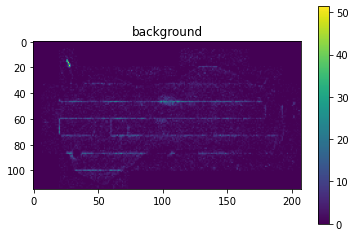

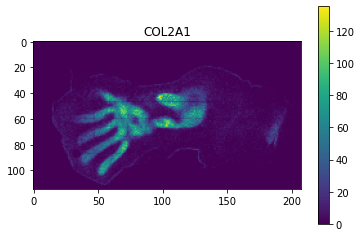

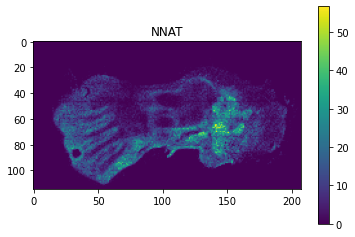

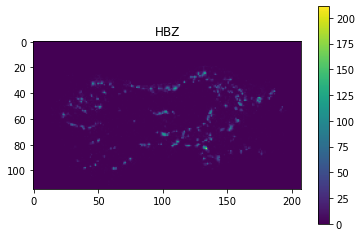

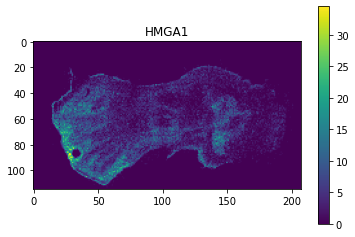

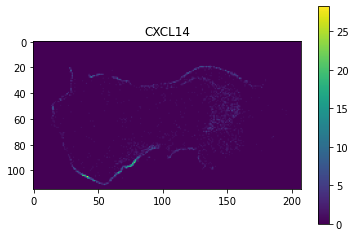

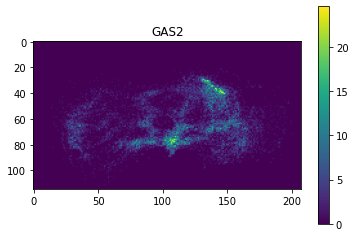

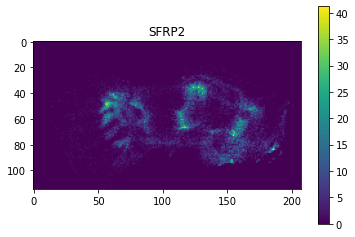

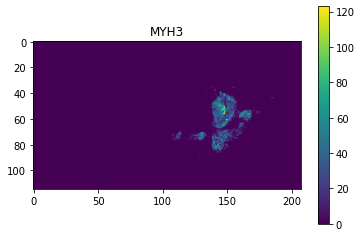

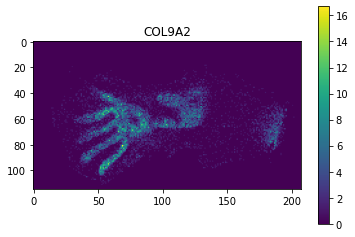

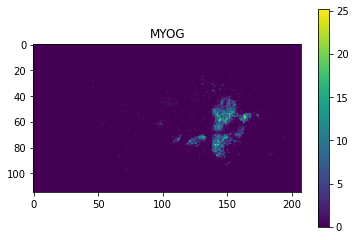

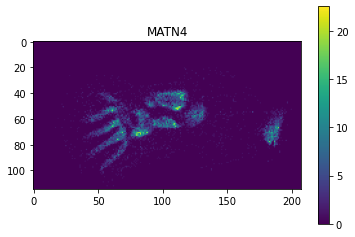

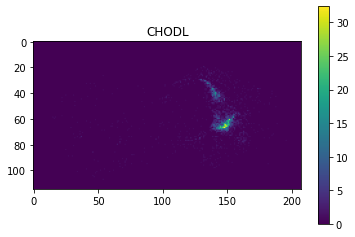

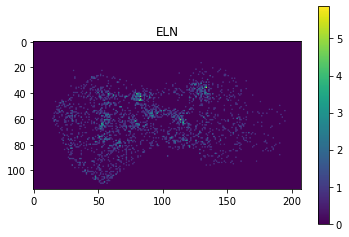

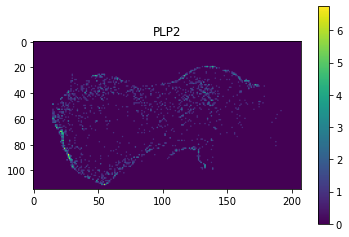

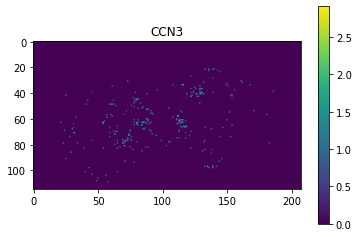

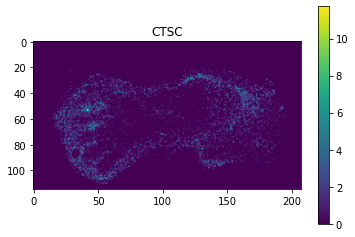

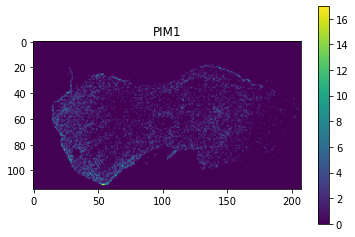

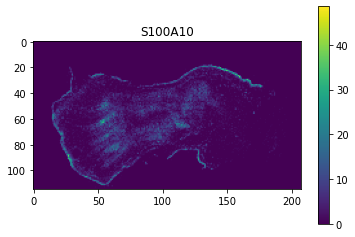

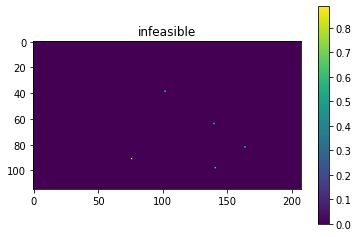

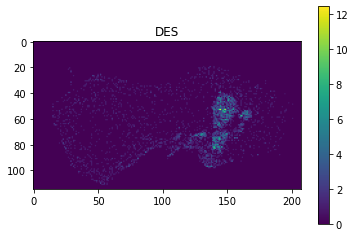

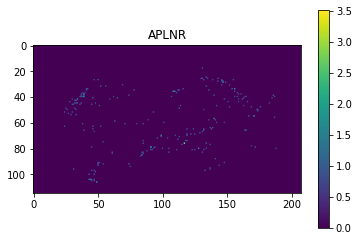

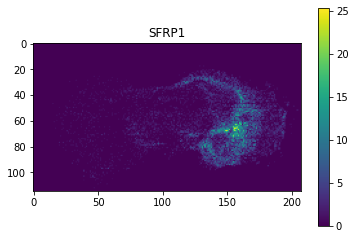

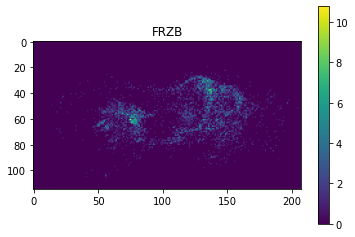

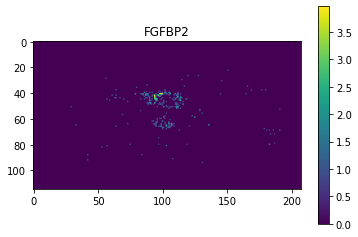

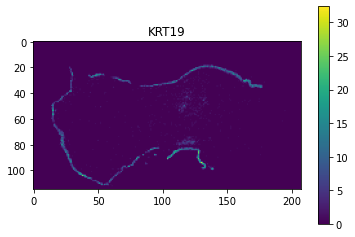

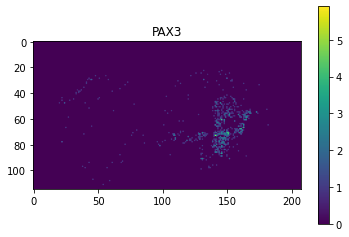

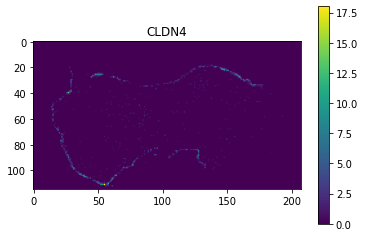

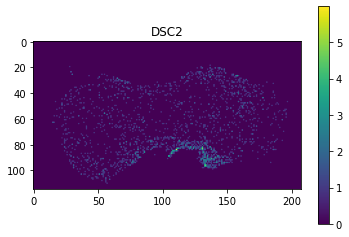

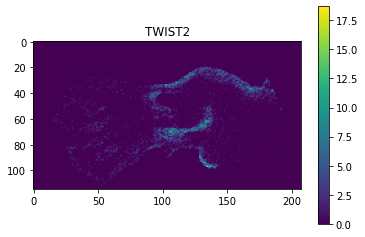

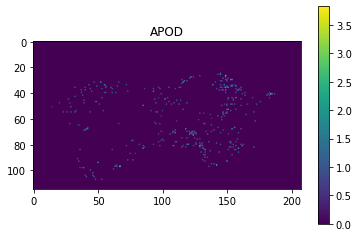

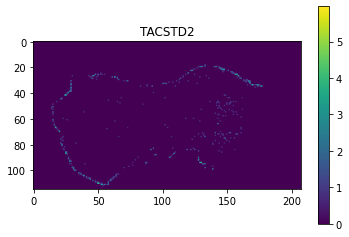

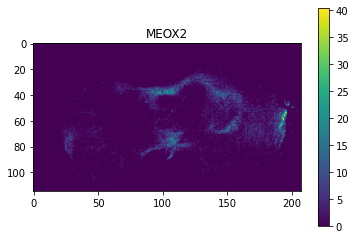

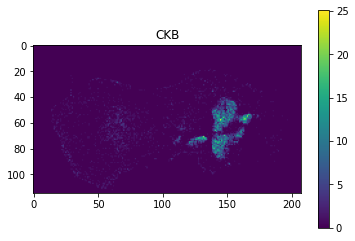

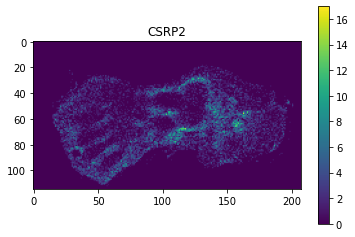

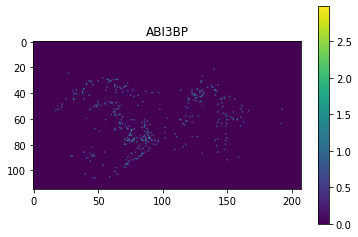

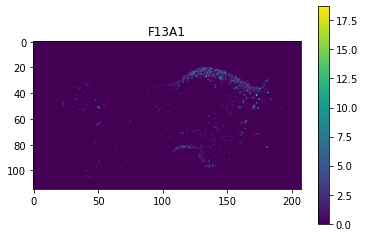

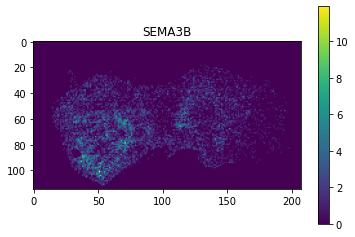

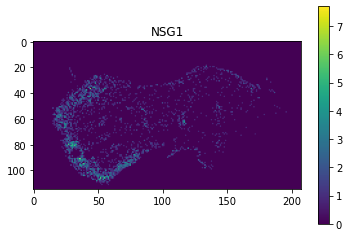

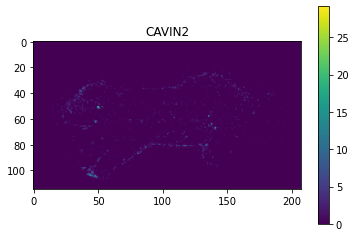

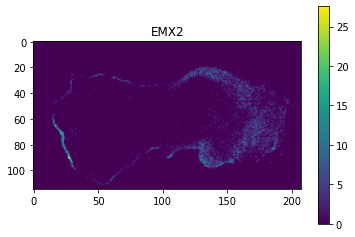

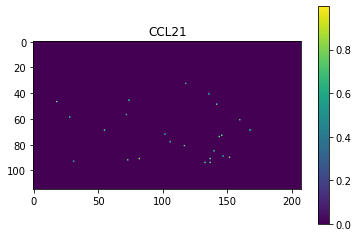

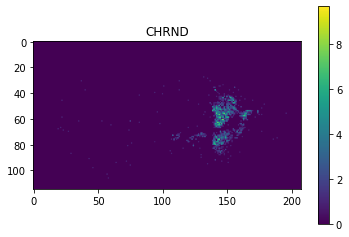

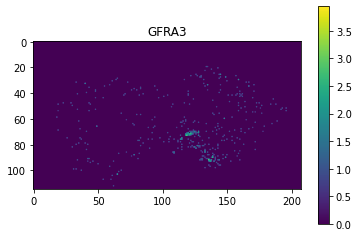

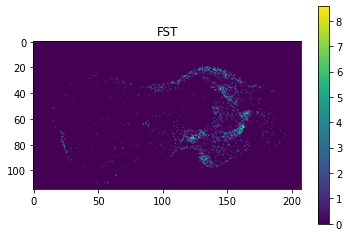

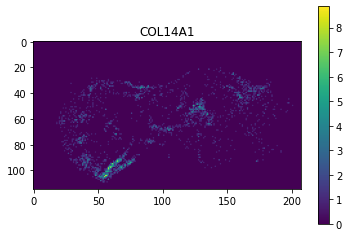

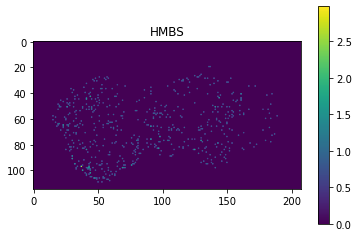

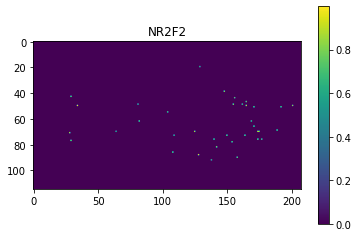

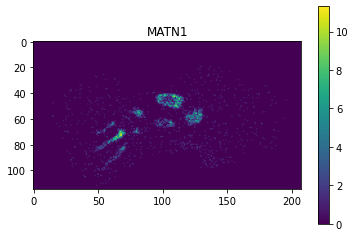

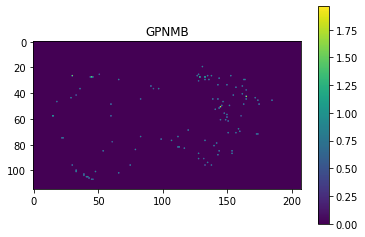

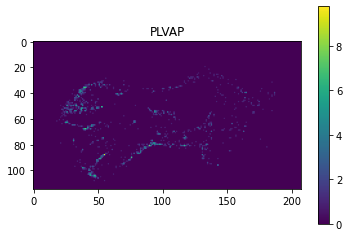

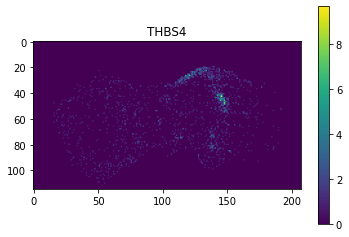

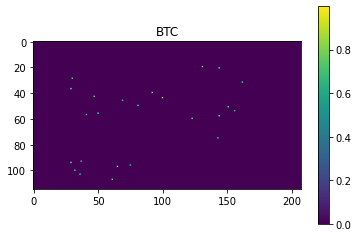

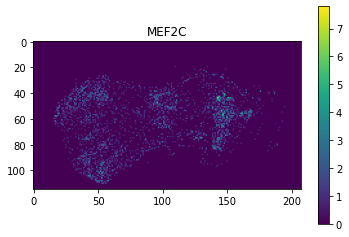

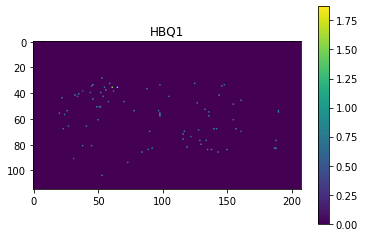

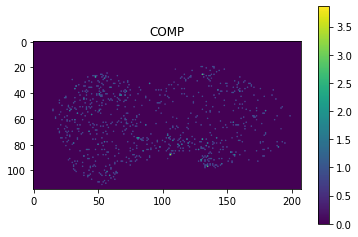

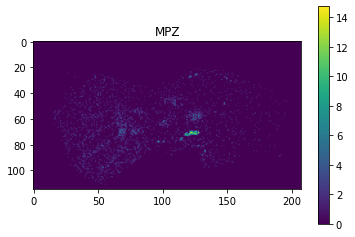

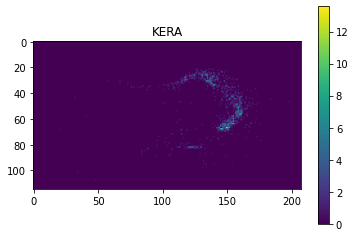

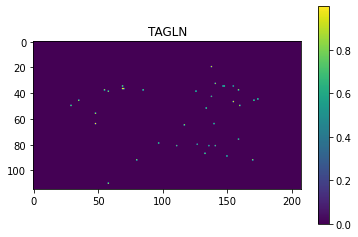

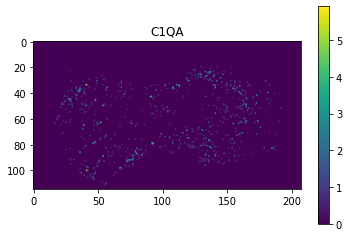

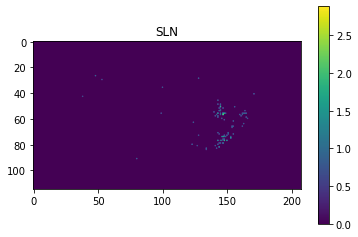

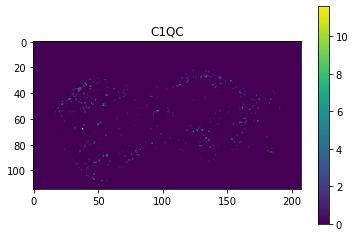

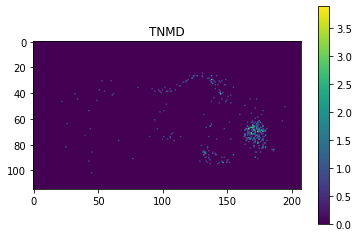

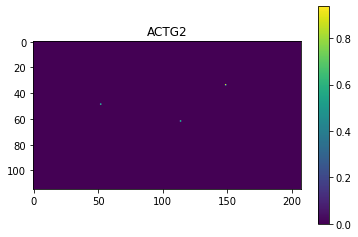

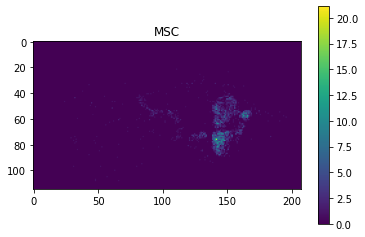

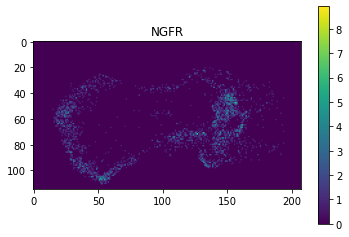

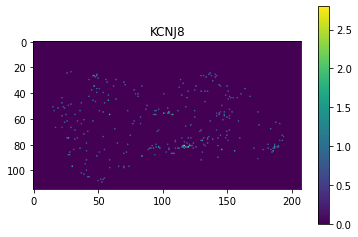

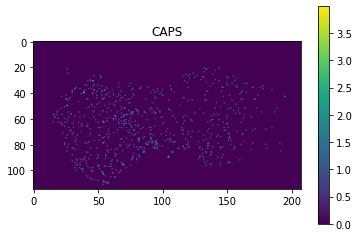

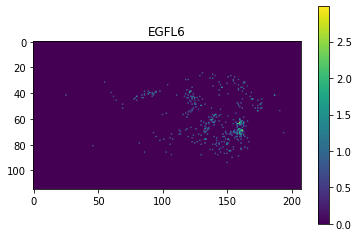

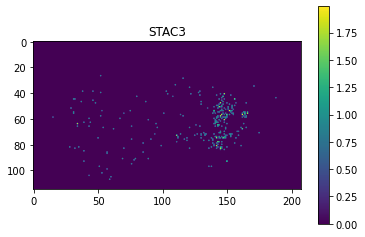

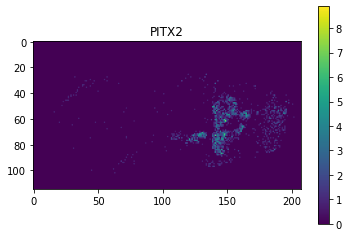

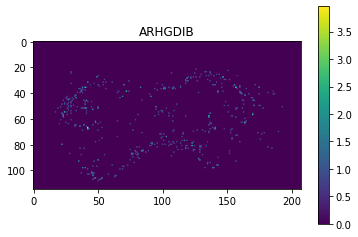

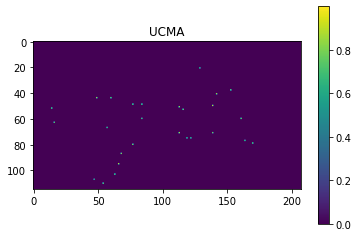

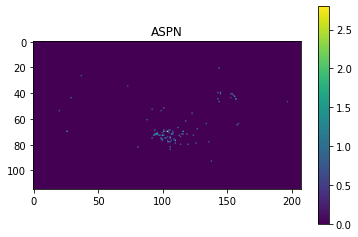

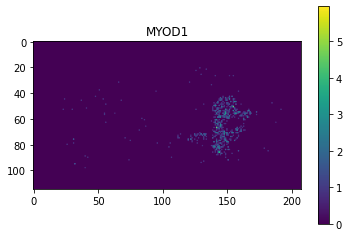

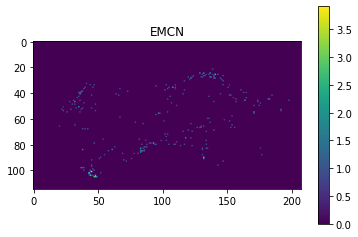

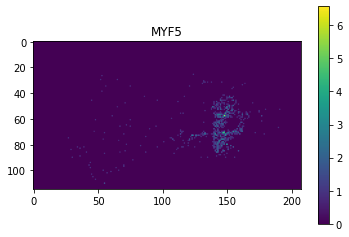

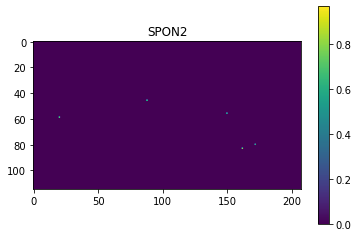

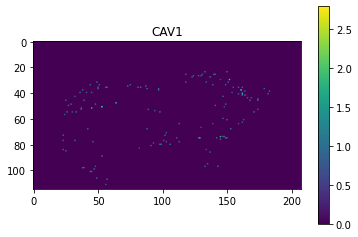

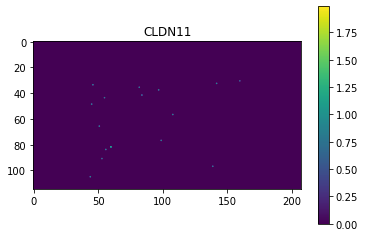

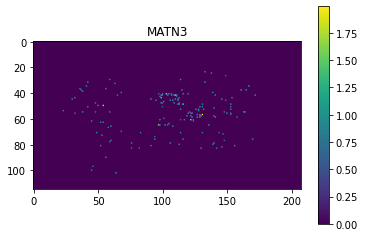

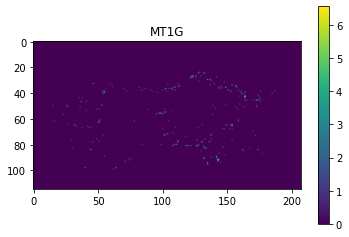

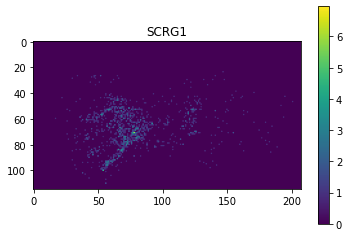

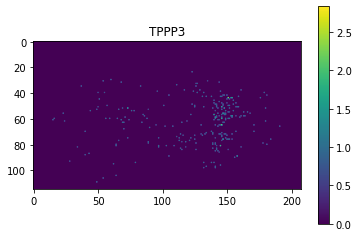

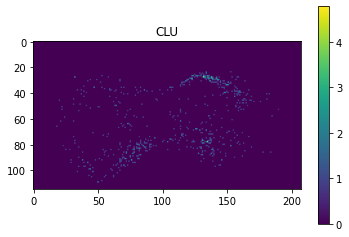

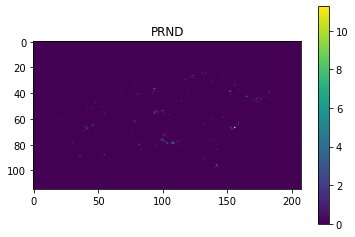

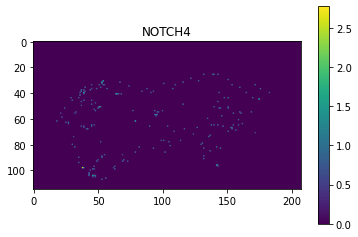

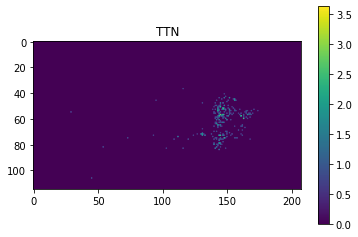

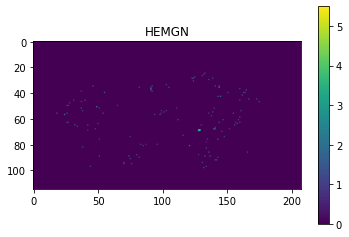

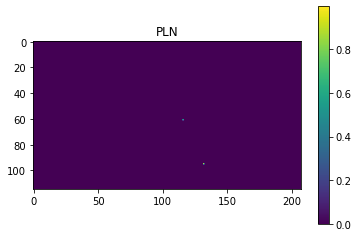

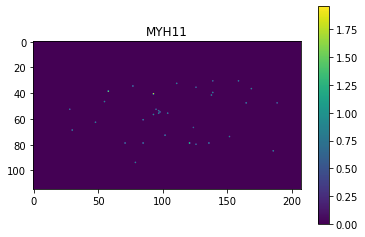

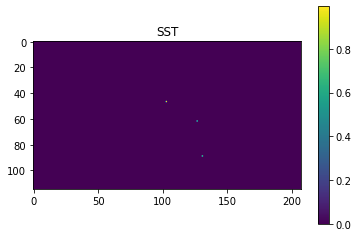

In [47]:
for n in decoded_peaks.Name.unique():
    hm = heatmap_pattern(decoded_peaks, n, grid=150)
    fig, ax = plt.subplots()
    pos = ax.imshow(hm)
    fig.colorbar(pos, ax=ax)
    plt.title(n)
#     plt.show()
    plt.savefig(f"/lustre/scratch117/cellgen/team283/tl10/HZ_HLB/40x_heatmaps/{n}.png", dpi=200)

In [23]:
import zarr

In [24]:
ds = zarr.load(raw_path)

In [31]:
ds[5].shape

(1, 35, 1, 837, 1542)

In [27]:
! pip install napari-text-layer

In [3]:
viewer = napari.Viewer()

In [4]:
img_layer = viewer.layers[0]

In [18]:
properties = {'confidence': [1], 'class': ['B']}
text = {
    'text': 'Confidence is {confidence:.2f}',
    'size': 20,
    'color': 'green',
    'translation': np.array([-30, 0]),
}

In [20]:
shapes_layer = viewer.add_shapes(
    [[[50, 50], [50, 100], [100, 100], [100,  50]],],
    face_color='transparent',
    edge_color='yellow',
    properties=properties,
    text=text,
    name='bounding box'
)

In [7]:
viewer.text_overlay.visible=True

In [8]:
shapes_layer.text = "testetset"

In [11]:
shapes_layer.text.view_text("test")

array([''], dtype='<U1')

In [19]:
! pip install scanpy==1.8.2

     |████████████████████████████████| 2.0 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 101.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 87.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 26.7 MB 88.6 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 82.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 381 kB 58.3 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82706 sha256=40cd6ef4661b

In [20]:
import scanpy as sc

2022-04-04 13:12:25,352 [INFO] Note: NumExpr detected 30 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-04-04 13:12:25,358 [INFO] NumExpr defaulting to 8 threads.


In [21]:
adata = sc.read("/nfs/team283_imaging/HZ_HLB/playground_Tong/HZ_HLB_hindlimb_20220322_63x_label_image_countTable/out_opt_flow_registered_decoded_df.h5ad")

In [25]:
adata.obsm

AxisArrays with keys: X_pca, X_umap, spatial